# 6. Azure Databricks

## 6.1. Magic Commands

* Magic Commands are specific to the Databricks notebooks
* A single percent (%) symbol at the start of a cell identifies a Magic Commands

### &percnt;python, &percnt;scala, &percnt;sql, &percnt;r

* **&percnt;python** -> Runs the cell with python
* **&percnt;scala** -> Runs the cell with scala
* **&percnt;sql** -> Runs the cell with sql
* **&percnt;r** -> Runs the cell with R

### &percnt;sh
Below cell with `%sh` act as a linux shell.

In [ ]:
%sh ls -la

### &percnt;run
* You can run a notebook from another notebook by using the Magic Command **%run**
* All variables & functions defined in that other notebook will become available in your current notebook

`Note` that here `./Includes/hello-world.py` will be called as below without referencing `.py`.

In [ ]:
%run "./Includes/hello-world"

### Databricks Utilities - dbutils
* You can access the DBFS through the Databricks Utilities class (and other file IO routines).
* An instance of DBUtils is already declared for us as `dbutils`.
* For in-notebook documentation on DBUtils you can execute the command `dbutils.help()`.

Additional help is available for each sub-utility:
* `dbutils.fs.help()`
* `dbutils.meta.help()`
* `dbutils.notebook.help()`
* `dbutils.widgets.help()`

Let's take a look at the file system utilities, `dbutils.fs`

### dbutils.fs.mounts()
* All our datasets should be mounted
* We can use `dbutils.fs.mounts()` to verify that assertion
* This method returns a collection of `MountInfo` objects

In [ ]:
mounts = dbutils.fs.mounts()

for mount in mounts:
  print(mount.mountPoint + " >> " + mount.source)

# Print out will be like
# /databricks-datasets >> databricks-datasets
# /databricks-results >> databricks-results

### dbutils.fs.ls(..)
* And now we can use `dbutils.fs.ls(..)` to view the contents of that mount
* This method returns a collection of `FileInfo` objects

In [ ]:
files = dbutils.fs.ls("/databricks-datasets/")

for file_info in files:
  print(file_info.path)
  
# Print out will be like
# dbfs:/databricks-datasets/adult/
# dbfs:/databricks-datasets/airlines/

### display(..)

Besides printing each item returned from `dbutils.fs.ls(..)` we can also pass that collection to another Databricks specific command called `display(..)`.

In [ ]:
files = dbutils.fs.ls("/databricks-datasets")

display(files)
# Display will render the files as in the below cell

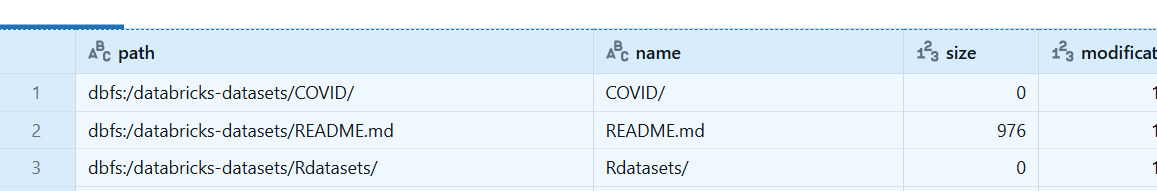

### &percnt;fs

We can also use the wrapper around `dbutils.fs` and it is the Magic Command known as **&percnt;fs**.

The following call is equivalent to the previous call, `display(dbutils.fs.ls("/databricks-datasets"))`

In [ ]:
%fs ls /databricks-datasets